<p align = "middle">
  <strong><font size = 20>AM 207 Final Project: WHMC</font></strong><br>
  <i><font size = 4>Wormhole Hamiltonian Monte Carlo</font></i> <font size = 4>(Shiwei Lan et al.)</font><br><br>
  <font size = 1>by Sachin Mathur, Smarak Maity, and Alexander Wong</font>
</p>


## Problem Statement

Many hierarchical models and neural networks have multi-modal posterior distributions, which HMC struggles with in terms of speed.  Furthermore, traditional HMC fails in distributions where the modes are distinct and separated by a plateau -- it usually can only pick up on a single mode.  This paper, *Wormhole Hamiltonian Monte Carlo*, tries to overcome problems associated with exploration of multiple modes and speed of sampling by using the inherent geometry of the manifold -- Riemannian curvature -- as well as a new mechanic dubbed "wormholes".

## Context / Scope

Failure to capture all the modes in a multimodal distribution is not a new phenomenon.  It is, however, prevalent regardless of the dimension, and regardless of the (non-simple) model type, including neural networks and bayesian heirarchical models.  In reality, most machine learning / Bayesian model posteriors have multiple modes (if not, then it wouldn't even make sense to struggle with capturing posteriors in the first place).  HMC is one of the most common techniques for sampling, yet so agonizingly slow and not always functioning -- theoretical convergence does not always translate to convergence in practice.

In order to rectify these time and convergence issues, machine learners and statisticians have proposed incremental improvements to HMC.  Aside from tempering, researchers proposed RHMC, which utilized Riemannian curvature in order to efficiently navigate through the distribution's inherent geometry.  From here, Lan et al proposed an additional technique, "wormholing," in an attempt to eliminate modal difficulties.






## Existing Work

All of the existing work listed here are used exensively in the High Level and Details section.  Therefore, to avoid repetition we will simply cite the papers here.
<br><br>
*Introducing an Explicit Symplectic Integration Scheme for Riemannian Manifold Hamiltonian Monte Carlo.* (Adam D. Cobb, Atılım Güneş Baydin, Andrew Markham, Stephen J. Roberts)
<br><br>

*Riemann Manifold Langevin and Hamiltonian Monte Carlo* (Mark Girolami, Ben Calderhead, Siu A. Chin)
<br><br>

*Regeneration Darting HMC - Distributed and adaptive darting Monte Carlo through regenerations* (Ahn S, Chen Y, Welling M.)






## Contribution

As stated in the problem statement, WHMC tries to efficiently identify modes in, and sample from, multimodal distributions.


## High Level

#### **RHMC**
Riemann HMC (RHMC) uses Riemannian manifolds that are differentiable rather than euclidean spaces in HMC. This allows it to use kinetic energy functions with covariance which can explore correlated and distant spaces more effectively. Besides removing tractional HMC's limitation of exploration of only up to half the number of dimensions in single iteration, RHMC computes shorter trajectories over curved spaces using riemannian manifold.

#### **WHMC**
Similar to RHMC, WHMC is based on numerical simulation of trajectories in curved space, but with a specially defined *wormhole metric* that artificially reduces the distance between the modes of the distribution, allowing the sampler to quickly jump between modes.

#### **Regeneration**
The main purpose of the regeneration step is to find new modes in the distribution.  By fitting a mixture of gaussians to the known modes, we then subtract that fit from the original distribution, which theoretically gives us a distribution with only unknown modes.  This regeneration step, however, can only occur if we first meet the Metropolis Hastings accept/reject criteria, followed by sampling a 1 from a bernoulli random variable.  In short, the probability of getting a regeneration is almost surely 0 -- but it is theoretically possible.


## Details

#### **RHMC**






The Riemannian HMC Equations as an extension of HMC are given below: <br><br>
$$ H(\theta,\mathbf{p}) = - \mathcal{L}(\theta) + \frac{1}{2}\log\bigl((2\pi)^D | G(\theta)|\bigr) + \frac{1}{2}\mathbf{p}^TG(\theta)^{-1}\mathbf{p} $$<br>
so that $\exp(-H(\theta,\mathbf{p})) = p(\theta,\mathbf{p}) = p(\theta)p(\mathbf{p}|\theta)$ and the marginal density<br><br>
$$ p(\theta)\propto\int\exp(-H(\theta,\mathbf{p}))d\mathbf{p} = \frac{\exp\{\mathcal{L}(\theta)\}}{\sqrt{2\pi^D|G(\theta)|}}\int\exp\left\{-\frac{1}{2}\mathbf{p}^TG(\theta)^{-1}\mathbf{p}\right\}d\mathbf{p} = \exp\{\mathcal{L}(\theta)\} $$<br>
Where $G(\theta)$ is Gaussian Distribution
The potential and kinetic energy functions of Riemannian HMC are given below <br><br>

$$\frac{d\theta_i}{d\tau} = \frac{\partial H}{\partial p_i} = \bigl(G(\theta)^{-1}\mathbf{p}\bigr)_i\\[2ex]
\frac{dp_i}{d\tau} = -\frac{\partial H}{\partial \theta_i} = \frac{\partial \mathcal{L}(\theta)}{\partial \theta_i} - \frac{1}{2}\text{Tr}\left[G(\theta)^{-1} \frac{\partial G(\theta)}{\partial \theta_i}\right] + \frac{1}{2}\mathbf{p}^TG(\theta)^{-1}\frac{\partial G(\theta)}{\partial \theta_i}G(\theta)^{-1}\mathbf{p}$$<br>

Unlike HMC, the RHMC joint density is not factorizable and the log-likelihood does not correspond to a separable Hamiltonian. The Hamiltonian is computed by continuously taking gradients with respect to the log-likelihood function with parameters and momentum in a time dependent manner. The hamiltonian metric is variable and different types of metrics can be used.
The leap-frog integrator uses user-defined step_size and the number_of_steps to update the momentum and parameters using the gradients and the computed Hamiltonian metric. After convergence of parameter and momentum, the Hamiltonian metric is computed on the new parameter and compared with the previous value. The parameter is accepted depending on the acceptance probability.
Steps in RHMC:
1.	Use an initial parameter 
2.	Use a proposal distribution to obtain initial momentum
3.	Compute RM-Hamiltonian based on the parameter and momentum
4.	Compute new parameter and momentum using leapfrog step
5.	Compute RM-Hamiltonian using the new parameter and momentum
6.	Compare the new Hamiltonian metric with Hamiltonian from step 1
7.	Accept the new parameter if the difference if hamiltonians is < Uniform(0,1)
8.	Repeat steps 2 through 7 to obtain samples



#### **WHMC**

WHMC is similar to RHMC in the way that we simulate trajectories in curved space, but with a metric that contains "wormholes" allowing the sampler to quickly jump between modes.
In particular, we use a *pseudo wormhole metric* $\mathbf{G}^*_W(\theta)$.
For two modes located at $\hat{\mathbf{\theta}}_1$ and $\hat{\mathbf{\theta}}_2$, and the line segment joining them $v_W = \hat{\mathbf{\theta}}_2 - \hat{\mathbf{\theta}}_1$, it is given by

\begin{aligned}
\mathbf{G}^*_W(\theta)(\mathbf u, \mathbf w)
&= \langle
\mathbf u - \langle \mathbf u, \mathbf v^*_W \rangle \mathbf v^*_W,
\mathbf w - \langle \mathbf w, \mathbf v^*_W \rangle \mathbf v^*_W
\rangle\\
&= \mathbf u^T
\left[
  \mathbf I - \mathbf v^*_W (\mathbf v^*_W)^T
\right]
\mathbf w,
\end{aligned}

essentially taking the inner product of the components orthogonal to $\mathbf v^*_W$ and setting the distance along the line segment to zero.

The metric is made positive definite by adding a small amount of the distance along the line segment,

$$
\mathbf{G}_W = \mathbf{G}^*_W + \epsilon \mathbf v^*_W(\mathbf v^*_W)^T
$$

Finally, the overall metric is defined as a weighted average of the identity metric, and the wormhole metric multiplied by a *mollifying function* $m(\theta)$.

$$
\mathbf G(\theta) = (1 - m(\theta)) \mathbf I + m(\theta) \mathbf{G}_W
$$

The mollifying function ensures that the wormhole metric is only influential in a small region around the wormhole itself.

In addition to this new metric, WHMC also makes use of two other adjustments.

1. A vector field $\mathbf f$ is added, that modifies the Hamiltonian dynamics as:
\begin{aligned}
\dot{\mathbf\theta} &= \mathbf v + \mathbf f(\mathbf \theta, \mathbf v)\\
\dot{\mathbf v} &= -\nabla_{\mathbf\theta}U(\mathbf\theta)
\end{aligned}
This is suitably chosen to enforce movement between modes, such that when the sampler goes into a wormhole it comes out the other side.

2. An auxiliary dimension, $\mathbf\theta_{D+1}$ is added, so that the coordinate vectors are now $(\mathbf\theta, \mathbf\theta_{D+1})$.
The wormholes are always defined between points in the *real world*, $(\hat{\mathbf{\theta}}_1, +h)$, and points in the *mirror world*, $(\hat{\mathbf{\theta}}_2, -h)$.
This is introduced so that the wormholes do not change the original HMC dynamics.
It also ensures that the sampler does not just keep jumping between modes, but samples from the vicinity of one mode for a while before jumping to the next mode.

With these adjustments, the WHMC algorithm with known modes is as follows (this algorithm is repeated for the required number of samples):

1. Start from an initial position $\mathbf\theta$ (with auxiliary coordinate)
2. Sample the velocity $\mathbf v$ from a normal distribution
3. Simulate dynamics as follows, for $L$ steps:

  1. Perform half update of $\mathbf v$ as per standard HMC
  2. If a jump has occurred already, perform full update of $\mathbf\theta$ as per standard HMC.
  3. If a jump hasn't occurred, repeat for $M$ steps:

    1. Find the closest mode
    2. Calculate mollifying functions $m_{k}(\mathbf\theta)$ for all the modes $k = 1\cdots K$ in the opposite world
    3. Sample an uniform R.V., $u \sim \text{Unif}(0, 1)$
    4. If $u < 1 - \sum_k m_k(\mathbf\theta)$, do not jump, and perform full update of $\mathbf\theta$ as per standard HMC.
    5. Else, choose one of the $K$ modes with probability proportional to $m_k(\mathbf\theta)$, and update $\theta$ to the position of the new mode (This position update is formalized using the vector field $\mathbf f$, and I have skipped some of the details here)

  4. Perform half update of $\mathbf v$ as per standard HMC
  5. Accept or reject proposal for $\mathbf\theta$ based on energy difference, accounting for energy adjustment when a jump has occurred

#### **Regeneration**

Again, the purpose of the Regeneration Step is to locate new modes in the target distribution.  The main idea is to traverse a distribution with the known modes removed, in order to find new ones.  In order to do so, we need the following:<br><br>
Let $q(\theta)$ represent the fitted distribution; that is, the distribution we will subtract later.  Let $\pi(\theta)$ represent the original distribution, AKA the one we want to sample from.  Let $\theta^*$ be the proposed point, and let $\theta$ be the "old" point.<br><br>
$$\begin{array}{lc}
\text{Transition Kernel}\quad&\quad T(\theta^*|\theta) = q(\theta^*)\cdot \min\left\{1,\dfrac{\pi(\theta^*)/q(\theta^*)}{\pi(\theta)/q(\theta)}\right\}\\[2ex]
\text{Mixing Coefficient} \quad & \quad S(\theta) = \min\left\{1,\dfrac{1}{\pi(\theta)/q(\theta)}\right\}\\[2ex]
\text{Independence Kernel} \quad & \quad Q(\theta^*) = q(\theta^*)\cdot \min\left\{1,\dfrac{\pi(\theta^*)}{q(\theta^*)}\right\}
\end{array}$$<br>
With these, the necessary conditions for regeneration are satisfied (inputs not included for clarity):<br><br>
$$\begin{array}{c}
R = \begin{cases}\frac{T - SQ}{1-S} & S\in[0,1)\\
1&S=1\end{cases}\\[2ex]
T\geq SQ
\end{array}$$<br>
Since the conditions for a Regeneration are satisfied, we will decide to enter a regeneration with a probability $p=\frac{SQ}{T}$.  If we do get a Regeneration, then we must optimize the following manifold (the "tempered residual potential energy"):<br><br>
$$ U_r(\theta,\text{Temp}) = -\ln\left[ \pi(\theta) - \exp\left(\frac{\ln(q(\theta))}{\text{Temp}}\right) + 1 \right]\\[2ex]
= -\ln\left[ \pi(\theta) - \exp\left(\ln(q(\theta)^\frac{1}{\text{Temp}})\right) + 1 \right]\\[2ex]
= -\ln\left[ \pi(\theta) - q(\theta)^\frac{1}{\text{Temp}} + 1 \right]$$<br>
The main significance of this manifold is that it is essentially the original distribution minus the fitted distribution.  In other words, the original distribution with the known modes subtracted.

Now, for the algorithm:

1. Do some sampling method to get an initial state (WHMC, in this case)
2. We then fit the known modes with a mixture of gaussians (peaks at modes, cov = $I$).  This is the $q(\theta)$ distribution.
3. Propose $\theta^*\sim q(\theta)$, do Metropolis Hastings Accept/Reject
4. If Reject, then use the original $\theta$ and **repeat**.  If Accept, go to next step.
5. Determine if a Regeneration occurs by sampling a Bernoulli Random Variable with a probability of $p=SQ/T$ (1 if yes, 0 if no)
6. Regen Yes: Use Tempered Gradient Descent to try and find new modes $\qquad$ 6. Regen No: use $\theta^*$ as sample and **repeat** (Normal MH)
7. (Regen Cont.) If a new mode is found (grad < $\epsilon$), append the new mode to the mode list, then update $q(\theta)$ with the new mode added on.
8. Get a new sample, $\theta'$, from this new $q(\theta)$ and keep evaluating $\pi(\theta')$ until you arrive at a reasonable probability ($\pi(\theta')>\delta$)
9. Use this new sample, and repeat

The algorithm is repeated $L$ times, where $L$ is the number of leapfrog steps (from WHMC).

## Experiments

### **Initialization**

In [0]:
# Common imports
from autograd import grad, hessian
from autograd import numpy as np
from autograd import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline
import time

In [0]:
# The distribution: mixture of Gaussians
def mixture_gaussians(means, covs):
    dists = lambda x: [sp.stats.multivariate_normal.pdf(x,mean=means[i],cov=covs[i]) for i in range(len(means))]
    return lambda x: sum(dists(x))/len(means)

means = np.array([[10,30],
                  [10,10],
                  [60,60],
                  [30,30],
                  [50,10]])

covs = np.array([np.eye(2),
                 np.eye(2),
                 np.eye(2),
                 np.eye(2),
                 np.eye(2)])

distribution_mg = mixture_gaussians(means,covs)

### **WHMC with known modes**

In [0]:
# WHMC with known modes
class EuclidGaussKE:
    def __init__(self, mass):
        self.M = mass
        self.N = len(mass)
    
    # We will use velocity instead of momentum to be consistent with the paper
    def kinetic_energy(self, v):
        return 0.5 * np.sum(self.M * v**2 + np.log(np.abs(self.M)) + np.log(2 * np.pi))
    
    # gibbs_sample will return velocity
    def gibbs_sample(self):
        return np.random.normal(np.zeros(self.N))
    

class WHMCSampler:
    def __init__(self, params):
        # New params
        self.modes = params['modes']
        self.h = params['world_distance']
        self.M = params['fixpoint_steps']
        self.F = params['influence_factor']
        # Params that were present in HMC
        self.eps = params['step_size']
        self.L = params['leapfrog_steps']
        self.N = params['total_samples']
        self.q0 = params['position_init']
        # With extra dimension
        self.D = len(self.q0)
        self.m = np.ones(self.D + 1)
        # self.burn_in = params['burn_in']
        # self.thinning = params['thinning_factor']
        # self.skip = round(self.burn_in * self.N)
        
    def closest_mode(self, q):
        dist_sq = np.sum((q[:-1] - self.modes) ** 2, axis=1)
        closest = np.argmin(dist_sq)
        world = -self.h/2 if q[-1] < 0 else self.h/2
        return closest, world
    
    def mollifying_functions(self, q, k, world):
        theta_k = np.append(self.modes[k], world)
        thetas = np.concatenate((self.modes, np.transpose([-world * np.ones(len(self.modes))])), axis=1)
        dist_1 = np.linalg.norm(q - theta_k)
        dist_2 = np.linalg.norm(q - thetas, axis=1)
        dist_12 = np.linalg.norm(theta_k - thetas, axis=1)
        return np.exp(-(dist_1 + dist_2 - dist_12) / self.F)
    
    def samples(self, distribution):
        # We will refer to the coordinates as q and the mode locations as theta
        # With extra dimension
        q, qs = np.append(self.q0, 0), np.zeros((self.N, self.D + 1))
        # "θ_D+1 contributes (1/2)θ_D+1^2 to the total potential energy"
        U = lambda q: -np.log(distribution(q[:-1])) + 0.5 * q[-1] ** 2
        K = EuclidGaussKE(self.m)
        H = lambda v, q: K.kinetic_energy(v) + U(q)

        def whmc_step(v_old, q_old):
            grad_U = grad(U)
            epsby2 = self.eps / 2
            deltaE, jumped, adjusted = 0, False, False
            v_l, q_l = v_old, q_old
            for step in range(self.L):
                v_half = v_l - epsby2 * grad_U(q_l)
                if jumped:
                    q_l = q_l + self.eps * v_half
                else:
                    closest, world = self.closest_mode(q_l)
                    q_m = q_l
                    for jump_step in range(self.M):
                        ms = self.mollifying_functions(q, closest, world)
                        if np.random.uniform() < 1 - np.sum(ms):
                            f = v_half
                        else:
                            ps = np.array(ms) / np.sum(ms)
                            jump = np.random.choice(len(ps), p=ps)
                            f = (np.append(self.modes[jump], -world) - q_m) / epsby2
                            jumped = True
                        if jump_step == 0:
                            f_fixed = f
                        q_m = q_l + epsby2 * (f_fixed + f)
                    closest_new, _ = self.closest_mode(q_m)
                    if closest_new != closest:
                        deltaE = U(q_m) - H(v_l, q_l)
                        adjusted = True
                    q_l = q_m
                v_l = v_half - epsby2 * grad_U(q_l)
                if adjusted:
                    deltaE = deltaE + K.kinetic_energy(v_l)
                    adjusted = False
            return v_l, q_l, deltaE
        
        t_start = time.time()
        for i in range(self.N):
            if i % 100 == 0:
                # print('{}/{} samples, {} seconds'.format(i, self.N, round(time.time() - t_start)), end='\r', flush=True)
                print('{}/{} samples, {} seconds'.format(i, self.N, round(time.time() - t_start)))
            v = K.gibbs_sample()
            v_new, q_new, deltaE = whmc_step(v, q)
            log_accept = -H(v_new, q_new) + H(v, q) + deltaE
            if log_accept >= 0 or np.log(np.random.uniform()) < log_accept:
                v, q, = v_new, q_new
            qs[i] = q            
        return qs
        # return qs[self.skip::self.thinning]

In [0]:
# Running WHMC
params_mg_whmc = {
    'modes': means, #[[0], [10], [-10]],
    'world_distance': 1,
    'fixpoint_steps': 10,
    'influence_factor': 1,
    'step_size': 0.1,
    'leapfrog_steps': 10,
    'total_samples': 2000,
    'burn_in': 0.1,
    'thinning_factor': 2,
    'position_init': np.array([0.0,0.0])
}
samples_mg_whmc = WHMCSampler(params_mg_whmc).samples(distribution_mg)

0/2000 samples, 0 seconds


/usr/local/lib/python3.6/dist-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in double_scalars
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/usr/local/lib/python3.6/dist-packages/autograd/scipy/stats/multivariate_normal.py:50: RuntimeWarning: invalid value encountered in double_scalars
  unbroadcast_f(x, lambda g: -np.expand_dims(np.atleast_1d(ans * g), 1) * solve(allow_singular)(cov, (x - mean).T).T),


100/2000 samples, 4 seconds
200/2000 samples, 7 seconds
300/2000 samples, 11 seconds
400/2000 samples, 15 seconds
500/2000 samples, 18 seconds
600/2000 samples, 22 seconds
700/2000 samples, 26 seconds


/usr/local/lib/python3.6/dist-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: overflow encountered in double_scalars
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


800/2000 samples, 29 seconds
900/2000 samples, 33 seconds
1000/2000 samples, 37 seconds
1100/2000 samples, 40 seconds
1200/2000 samples, 44 seconds
1300/2000 samples, 47 seconds
1400/2000 samples, 51 seconds
1500/2000 samples, 55 seconds
1600/2000 samples, 58 seconds
1700/2000 samples, 62 seconds
1800/2000 samples, 65 seconds
1900/2000 samples, 69 seconds


/usr/local/lib/python3.6/dist-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


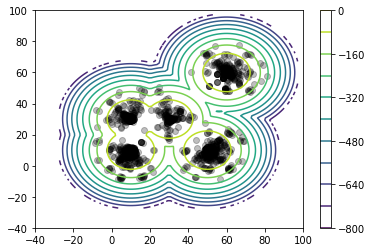

In [0]:
# Graphing WHMC
def plot_samples(samples):
    start, stop = -40, 100
    n_values = 100
    x_vals = np.linspace(start, stop, n_values)
    y_vals = x_vals
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = np.array([distribution_mg(i) for i in np.array([X.flatten(), Y.flatten()]).T])
    Z = Z.reshape(n_values, n_values)
    # Z.shape
    # Z = # np.sqrt(X**2 + Y**2)
    cp = plt.contour(X, Y, np.log(Z), 10)
    plt.colorbar(cp)
    plt.scatter(samples[:,0], samples[:,1], color=(0, 0, 0, 0.25))
    # plt.xlim((start,stop)); plt.ylim((start,stop));

plot_samples(samples_mg_whmc)

### **WHMC with mode search and regeneration**

In [0]:
def regen(modes, leapSteps, dims, pi, old): #modes, num leap steps, dimensions, the distribution we are trying to sample from, old theta
  currentModes = modes
  samples = []
  thetaOld = old
  for i in range(1,leapSteps):
    # Make fitted dist (q(theta)) with plain covar and known modes
    q = mixture_gaussians(currentModes,np.array([np.eye(dims)]*len(currentModes)))
    # propose a new point from this q(theta) distribution
    thetaNew = np.random.multivariate_normal(mean=currentModes[np.random.randint(low=0,high=len(currentModes))],cov=np.eye(dims))
    # get alpha
    alpha = min(1,(pi(thetaNew)/q(thetaNew)/(pi(thetaOld)/q(thetaOld))))
    # Define T, Q, and S
    T = q(thetaNew)*alpha
    S = min(1,1/(pi(thetaOld)/q(thetaOld))) #set c = 1, since it doesn't really matter
    Q = q(thetaNew)*min(1,(pi(thetaNew)/q(thetaNew)))
    #MH accept reject:
    if np.random.uniform() < alpha: #MH accept
      # Determine if regeneration
      # Sample from Bernoulli with probability defined as: p = S*Q/T
      if np.random.binomial(n=1,p=min(1,S*Q/T),size=1) is 1: #it is a regen
        #Define Tempered Residual Potential Energy, set c = 1
        U = lambda temp: lambda theta:-np.log(pi(theta) - q(theta)**(1/temp) + 1)
        #typical gradient descent w/ tempering
        stepsize = .1
        maxsteps = 100
        initialTemp = 1.2
        tempDecay = .99
        tempTemp = initialTemp
        thetaTemp = thetaOld
        epsilon = 1e-3 #the threshold for a new mode to be found
        for i in range(maxsteps):
          Ur = U(tempTemp)
          currentgrad = grad(Ur)(thetaTemp)
          if currentgrad <= epsilon: #new mode found
            currentModes.append(thetaTemp)
            break
          thetaTemp = thetaTemp + stepsize*currentgrad
          if not np.mod(i,round(maxsteps/10)):
            tempTemp = tempTemp*tempDecay
        propsample = np.random.multivariate_normal(mean=currentModes[np.random.randint(low=0,high=len(currentModes))],cov=np.eye(dims))
        while pi(propsample) <= .1:
          propsample = np.random.multivariate_normal(mean=currentModes[np.random.randint(low=0,high=len(currentModes))],cov=np.eye(dims))
        samples.append(propsample)
        thetaOld=propsample
      else: #it is not a regen
        samples.append(thetaNew)
        thetaOld= thetaNew
    else: #MH reject
      samples.append(thetaOld)
  return samples, currentModes

In [0]:
#some unknown means example
knownmeans = np.array([[10,30],
                  [10,10],
                  [60,60],
                  [30,30]])

samples_mg_whmc_regen, modes = regen(knownmeans, 1000, 2, distribution_mg, np.array([20.0,10.0]))
samples_mg_whmc_regen = np.array(samples_mg_whmc_regen)

/usr/local/lib/python3.6/dist-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


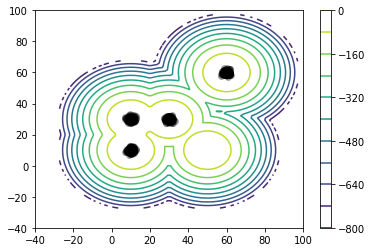

In [0]:
# Graphing WHMC with regen
plot_samples(samples_mg_whmc_regen)

### **RHMC**

In [0]:
# RHMC impl
def rrm_hamiltonian(q, p, log_prob):
    logp = log_prob(q)
    f_logp = -hessian(log_prob)(q)
    # c_f, lower_f = linalg.cho_factor(f_logp, lower=True)
    # finv_p = linalg.cho_solve((c_f, lower_f), p)
    finv_p = np.linalg.solve(f_logp, p)
    return np.sum([
        -logp,
        0.5 * len(q) * np.log(2 * np.pi),
        0.5 * np.linalg.slogdet(f_logp)[1],
        0.5 * np.dot(p, finv_p)
    ])

def leapfrog(q, p, log_prob, steps=10, step_size=0.1):
    n = len(q)

    # To take gradient wrt q and p at same time
    def rrm_hamiltonian_qp(qp):
        return rrm_hamiltonian(qp[:n], qp[n:], log_prob)

    def leapfrog_p(q0, p0):
        p = p0
        for i in range(100):
            p_prev = p
            gq = grad(rrm_hamiltonian_qp)(np.concatenate((q0, p)))[:n]
            # print('leapfrog_p\n\tq = {}\n\tp = {}\n\tgq = {}'.format(q, p, gq))
            p = p0 - 0.5 * step_size * gq
            if np.max((p - p_prev) ** 2) < 0.0005:
                break
        return p

    def leapfrog_q(q0, p0):
        q = q0
        gp0 = grad(rrm_hamiltonian_qp)(np.concatenate((q0, p0)))[n:]
        # print('leapfrog_q\n\tq = {}\n\tp = {}\n\tgp = {}'.format(q, p, gp0))
        for i in range(100):
            q_prev = q
            gp = grad(rrm_hamiltonian_qp)(np.concatenate((q, p0)))[n:]
            # print('leapfrog_q\n\tq = {}\n\tp = {}\n\tgp = {}'.format(q, p, gp))
            q = q0 + 0.5 * step_size * gp + 0.5 * step_size * gp0
            if np.max((q - q_prev) ** 2) < 0.0005:
                break
        return q

    qs, ps = [], []
    for step in range(steps):
        p = leapfrog_p(q, p)
        q = leapfrog_q(q, p)
        gq = grad(rrm_hamiltonian_qp)(np.concatenate((q, p)))[:n]
        p = p - 0.5 * step_size * gq
        qs.append(q)
        ps.append(p)
    return qs, ps

def rhmc_sample(log_prob, q_init, num_samples=10, num_steps_per_sample=10, step_size=0.1):
    q, qs = q_init, [q_init]
    num_rejected = 0
    t_start = time.time()

    for n in range(num_samples):
        logp = log_prob(q)
        f_logp = -hessian(log_prob)(q)
        p = np.random.multivariate_normal(np.zeros(len(q)), f_logp)
        H = rrm_hamiltonian(q, p, log_prob)
        leapfrog_qs, leapfrog_ps = leapfrog(q, p, log_prob, steps=num_steps_per_sample, step_size=step_size)
        q, p = leapfrog_qs[-1], leapfrog_ps[-1]
        H_new = rrm_hamiltonian(q, p, log_prob)
        rho = min(0.0, -H_new + H)
        if rho >= np.log(np.random.rand()):
            qs.append(q)
        if n % 10 == 0:
            print('{}/{} samples, {} seconds'.format(n, num_samples, round(time.time() - t_start)))

    return np.array(qs)

In [0]:
samples_mg_rhmc = rhmc_sample(lambda q: np.log(distribution_mg(q)), np.array([0.0, 0.0]), 500, 10, 0.01)

0/500 samples, 2 seconds
10/500 samples, 16 seconds
20/500 samples, 31 seconds
30/500 samples, 45 seconds
40/500 samples, 60 seconds
50/500 samples, 74 seconds
60/500 samples, 88 seconds
70/500 samples, 103 seconds
80/500 samples, 117 seconds
90/500 samples, 132 seconds
100/500 samples, 146 seconds
110/500 samples, 161 seconds
120/500 samples, 175 seconds
130/500 samples, 191 seconds
140/500 samples, 205 seconds
150/500 samples, 220 seconds
160/500 samples, 234 seconds
170/500 samples, 249 seconds
180/500 samples, 263 seconds
190/500 samples, 277 seconds
200/500 samples, 291 seconds
210/500 samples, 306 seconds
220/500 samples, 320 seconds
230/500 samples, 335 seconds
240/500 samples, 348 seconds
250/500 samples, 361 seconds
260/500 samples, 373 seconds
270/500 samples, 384 seconds
280/500 samples, 396 seconds
290/500 samples, 408 seconds
300/500 samples, 419 seconds
310/500 samples, 431 seconds
320/500 samples, 443 seconds
330/500 samples, 454 seconds
340/500 samples, 466 seconds
350/

/usr/local/lib/python3.6/dist-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


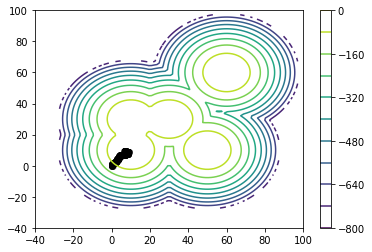

In [0]:
plot_samples(samples_mg_rhmc)

### **Results**

<p align="middle">
  <strong><font size ="6">RHMC</font></strong><br>
  <img src="https://drive.google.com/uc?id=1C5LpMBI8eT9EdBhNF7hf8B8ghb91AE9y" width="600"/><br>
</p>

As we can see, RHMC struggles to leave the mode that it starts in.  If there were more time, it might traverse to another mode or something, but as it stands, it still encounters both errors imposed by HMC.

<p align="middle">
  <strong><font size ="6">WHMC</font></strong><br>
  <img src="https://drive.google.com/uc?id=1rIwAf9zikwqKKMLDBvZr4sQPHpngst3N" width="600" />
</p>

Here, WHMC is great at sampling from the multiple modes compared to RHMC.  This means that the "wormhole" method works well when the modes are known.

<p align="middle">
  <strong><font size ="6">Regeneration</font></strong><br>
  <img src="https://drive.google.com/uc?id=1ChrCHwvT2UBuTjWgSKl_dbm6DDRNnfbr" width="600" />
</p>

Finally, we get to the regeneration step.  In the experiment, we ran the regeneration with some 4 known modes and 1 unknown mode, to see if it would be able to identify the last mode.  Clearly, it did not do that, and it stuck to the known modes for the duration of the test.  Had we run it infinitely long, it would theoretically identify the last mode.



## Evaluation

The work seems technically sound, in terms of the theory.  We can see that WHMC works extremely well **as long as we know the modes**.  In reality, we cannot possibly know all, much less any, of the modes in a distribution produced by real-data models.  The regeneration step is fine in theory, the probability that we will accept a new mode is definitely greater than 0, but it is, in fact, almost surely 0 (very small).  This minute probability means that we would have the run the regen step for potentially years before we find a new mode.  Additionally, suppose we had the known modes of a distribution, then there would be almost no point to doing WHMC, because the purpose was to find and sample from an unknown distribution.  If the regeneration fails, the whole algorithm fails.  Therefore, **the proposed model / inference method is totally impractical to use on real data and tasks.**  Due to lack of reproducability, the experimental section was extremely weak in terms of eliminating confounding factors.  The writing generalized, hand-waved, and even skipped steps, leaving large holes in explanation, and leading to a profound lack of understanding.
